In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***`LIBRARIES`***

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
!pip install --upgrade scikit-learn

!pip install category_encoders
!pip install joblib
!pip install scipy
!pip install --upgrade scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import recall_score, classification_report, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize
import sklearn
import xgboost

# ***`READ DATA`***

In [ ]:
excel_file_path = "/content/drive/My Drive/Colab Notebooks/NCKH (Mr. Hiếu)/CleanedData.xlsx"
df = pd.read_excel(excel_file_path)

In [ ]:
column_to_analyze = ["Gender", "YearOfLearning", "UniversityName", "Major", "GradeRank", "UseGPT?", "GradeTrend(GPT)",
                    "UsageInAcademics", "UsageBeyondAcademics", "AvgTimeUsage(1day)", "Priority", "Reliability", "ResultofGPT",
                    "InfluenceofGPT", "SatisfactionLevel", "Relevance", "Inspire&Motivate",
                    "PositiveInfluence", "NegativeInfluence", "Effective", "ReplaceTeacher",
                    "SpeechDoExam", "Dependence&Constraint", "LazyStudy&Think", "ImproveStudy",
                    "SatisfiedResult", "MechanismOfAction", "EasyToUnderstand", "CompareGoogle",
                    "FindJob", "WaytoAsk"]
df_copy = df[column_to_analyze]
df_copy.keys()

Index(['Gender', 'YearOfLearning', 'UniversityName', 'Major', 'GradeRank',
       'UseGPT?', 'GradeTrend(GPT)', 'UsageInAcademics',
       'UsageBeyondAcademics', 'AvgTimeUsage(1day)', 'Priority', 'Reliability',
       'ResultofGPT', 'InfluenceofGPT', 'SatisfactionLevel', 'Relevance',
       'Inspire&Motivate', 'PositiveInfluence', 'NegativeInfluence',
       'Effective', 'ReplaceTeacher', 'SpeechDoExam', 'Dependence&Constraint',
       'LazyStudy&Think', 'ImproveStudy', 'SatisfiedResult',
       'MechanismOfAction', 'EasyToUnderstand', 'CompareGoogle', 'FindJob',
       'WaytoAsk'],
      dtype='object')

# ***`Missing Values`***

In [ ]:
null_values = df_copy.isnull().sum()
null_values

,0
Gender,0
YearOfLearning,0
UniversityName,0
Major,0
GradeRank,0
UseGPT?,0
GradeTrend(GPT),0
UsageInAcademics,0
UsageBeyondAcademics,0
AvgTimeUsage(1day),0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 857 non-null    object
 1   YearOfLearning         857 non-null    int64 
 2   UniversityName         857 non-null    object
 3   Major                  857 non-null    object
 4   GradeRank              857 non-null    int64 
 5   UseGPT?                857 non-null    int64 
 6   GradeTrend(GPT)        857 non-null    int64 
 7   UsageInAcademics       857 non-null    int64 
 8   UsageBeyondAcademics   857 non-null    int64 
 9   AvgTimeUsage(1day)     857 non-null    int64 
 10  Priority               857 non-null    int64 
 11  Reliability            857 non-null    int64 
 12  ResultofGPT            857 non-null    int64 
 13  InfluenceofGPT         857 non-null    int64 
 14  SatisfactionLevel      857 non-null    int64 
 15  Relevance              

# **`Encoding`**

In [ ]:
df_copy.head(2)

,Gender,YearOfLearning,UniversityName,Major,GradeRank,UseGPT?,GradeTrend(GPT),UsageInAcademics,UsageBeyondAcademics,AvgTimeUsage(1day),...,SpeechDoExam,Dependence&Constraint,LazyStudy&Think,ImproveStudy,SatisfiedResult,MechanismOfAction,EasyToUnderstand,CompareGoogle,FindJob,WaytoAsk
0,Nữ,2,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ thông tin,5,1,3,5,5,1,...,1,3,3,3,3,3,3,Google,3,3
1,Nam,4,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ thông tin,5,1,3,4,5,1,...,1,4,5,5,4,5,4,ChatGPT,4,5


In [ ]:
encoder_features = ['Gender', 'UniversityName', 'Major', 'CompareGoogle']

for feature in encoder_features:
    label_encoding = LabelEncoder()
    df_copy[feature] = label_encoding.fit_transform(df_copy[feature])

# ***`VIF`***

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # Import the function

# Thêm hằng số (constant) vào dữ liệu để sử dụng VIF
X = sm.add_constant(df_copy.drop(columns=['GradeTrend(GPT)'])) # Use sm.add_constant
# Convert all columns to numeric if possible, otherwise handle non-numeric columns
X = X.apply(pd.to_numeric, errors='coerce') # Convert to numeric, replace errors with NaN
X = X.dropna(axis=1) # Drop columns with NaNs (non-numeric)

# Tính toán VIF cho từng biến
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Hiển thị kết quả
print(vif_data)

                 Variable        VIF
0                   const  49.826413
1                  Gender   1.130573
2          YearOfLearning   1.110164
3          UniversityName   1.042017
4                   Major   1.114575
5               GradeRank   1.077722
6                 UseGPT?   1.582306
7        UsageInAcademics   3.251147
8    UsageBeyondAcademics   2.550618
9      AvgTimeUsage(1day)   1.458388
10               Priority   1.758870
11            Reliability   2.544596
12            ResultofGPT   3.348966
13         InfluenceofGPT   2.221306
14      SatisfactionLevel   3.653241
15              Relevance   2.869575
16       Inspire&Motivate   2.468265
17      PositiveInfluence   2.561016
18      NegativeInfluence   1.633221
19              Effective   2.811719
20         ReplaceTeacher   1.603694
21           SpeechDoExam   1.567750
22  Dependence&Constraint   1.763126
23        LazyStudy&Think   1.562527
24           ImproveStudy   2.605607
25        SatisfiedResult   2.680576
2

# ***`Check Unballance Target features`***

In [ ]:
pd.crosstab(df_copy['GradeTrend(GPT)'],df_copy['GradeTrend(GPT)'], normalize='all')*100

GradeTrend(GPT),1,2,3
GradeTrend(GPT),,,
1,11.435239,0.000000,0.000000
2,0.000000,15.985998,0.000000
3,0.000000,0.000000,72.578763


In [ ]:
# Shuffle toàn bộ DataFrame
df_copy = df_copy.sample(frac=1, random_state=42).reset_index(drop=True)
df_copy['GradeTrend(GPT)'] = df_copy['GradeTrend(GPT)'].map({1: 0, 2: 1, 3: 2})

In [ ]:
X = df_copy.drop(columns = ['GradeTrend(GPT)'])
y = df_copy['GradeTrend(GPT)']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# ***`Train/Test Split`***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
train_class_counts = pd.Series(y_train).value_counts()

# Đếm số lượng các lớp trong y_test
test_class_counts = pd.Series(y_test).value_counts()

# In kết quả
print("Train Class Counts:")
print(train_class_counts)

print("\nTest Class Counts:")
print(test_class_counts)

Train Class Counts:
GradeTrend(GPT)
2    444
0    435
1    427
Name: count, dtype: int64

Test Class Counts:
GradeTrend(GPT)
1    195
0    187
2    178
Name: count, dtype: int64


# ***`Normalization`***

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
X_train_scaled.head()

,Gender,YearOfLearning,UniversityName,Major,GradeRank,UseGPT?,UsageInAcademics,UsageBeyondAcademics,AvgTimeUsage(1day),Priority,...,SpeechDoExam,Dependence&Constraint,LazyStudy&Think,ImproveStudy,SatisfiedResult,MechanismOfAction,EasyToUnderstand,CompareGoogle,FindJob,WaytoAsk
0,0.5,0.50,0.378378,0.851240,0.666667,1.0,0.75,0.50,0.000000,0.5,...,0.333333,0.50,0.50,0.50,0.50,0.5,0.75,0.333333,0.75,0.50
1,1.0,0.75,0.729730,0.380165,0.666667,0.0,0.00,0.00,0.666667,1.0,...,0.666667,0.75,0.00,0.00,0.50,0.5,0.75,1.000000,0.75,0.75
2,0.5,0.00,0.351351,0.066116,0.500000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.00,0.25,0.00,0.25,0.0,0.25,0.333333,0.00,0.00
3,0.5,0.50,0.378378,0.462810,0.666667,0.0,0.25,0.25,0.000000,0.5,...,0.333333,0.50,0.50,0.50,0.50,0.5,0.50,0.333333,0.50,0.50
4,0.5,0.50,0.432432,0.785124,0.833333,1.0,0.50,0.75,0.000000,0.5,...,0.333333,0.50,0.25,0.25,0.75,0.5,0.50,0.333333,0.75,0.50


In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


# ***`XGBoost`***

In [ ]:
!pip show xgboost scikit-learn
!pip install xgboost==1.7.6 scikit-learn==1.2.2


Name: xgboost
Version: 1.7.6
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy
Required-by: 
---
Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, category-encoders, fastai, imbalanced-learn, librosa, mlxtend, sentence-transformers, shap, sklearn-pandas, yellowbrick


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Tạo DMatrix từ dữ liệu
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Cài đặt tham số cho mô hình XGBoost (phân loại 3 lớp)
params = {
    'objective': 'multi:softmax',  # Phân loại đa lớp trả về nhãn
    'num_class': 3,  # Số lớp (ở đây là 3 lớp)
    'eval_metric': 'merror',  # Metric đo tỷ lệ lỗi phân loại
    'seed': 42  # Đảm bảo kết quả lặp lại được
}

# Huấn luyện mô hình
num_round = 100  # Số vòng lặp
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
predictions = bst.predict(dtest)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (Macro): {precision:.4f}')
print(f'Recall (Macro): {recall:.4f}')
print(f'F1 Score (Macro): {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8536
Precision (Macro): 0.8526
Recall (Macro): 0.8523
F1 Score (Macro): 0.8518
Confusion Matrix:
[[171   3  13]
 [  9 168  18]
 [ 22  17 139]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

# Tạo DMatrix từ dữ liệu
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Lưới tham số
param_grid_sbg = {
   'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Tìm kiếm thông số tốt nhất thủ công
best_score = float('inf')
best_params = None
for lr in param_grid_sbg['learning_rate']:
    for depth in param_grid_sbg['max_depth']:
        for child_weight in param_grid_sbg['min_child_weight']:
            for subsample in param_grid_sbg['subsample']:
                for colsample in param_grid_sbg['colsample_bytree']:
                    params = {
                        'objective': 'multi:softmax',
                        'num_class': 3,
                        'eval_metric': 'merror',
                        'learning_rate': lr,
                        'max_depth': depth,
                        'min_child_weight': child_weight,
                        'subsample': subsample,
                        'colsample_bytree': colsample,
                        'seed': 42
                    }
                    cv_results = xgb.cv(
                        params,
                        dtrain,
                        num_boost_round=100,
                        nfold=5,
                        early_stopping_rounds=10,
                        metrics='merror',
                        as_pandas=True
                    )
                    mean_error = cv_results['test-merror-mean'].min()
                    if mean_error < best_score:
                        best_score = mean_error
                        best_params = params

print("Best Parameters:", best_params)

# Huấn luyện mô hình tốt nhất
final_model = xgb.train(best_params, dtrain, num_boost_round=100)

# Dự đoán trên tập kiểm tra
predictions = final_model.predict(dtest)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (Macro): {precision:.4f}')
print(f'Recall (Macro): {recall:.4f}')
print(f'F1 Score (Macro): {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Best Parameters: {'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'merror', 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0, 'colsample_bytree': 1.0, 'seed': 42}
Accuracy: 0.8714
Precision (Macro): 0.8714
Recall (Macro): 0.8716
F1 Score (Macro): 0.8712
Confusion Matrix:
[[168   6  13]
 [ 10 166  19]
 [ 11  13 154]]


In [ ]:
expected = y_test
# Replace grid_search_xgb with final_model
predicted = final_model.predict(xgb.DMatrix(X_test_scaled)) # Convert X_test_scaled to DMatrix
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       187
           1       0.90      0.85      0.87       195
           2       0.83      0.87      0.85       178

    accuracy                           0.87       560
   macro avg       0.87      0.87      0.87       560
weighted avg       0.87      0.87      0.87       560

[[168   6  13]
 [ 10 166  19]
 [ 11  13 154]]


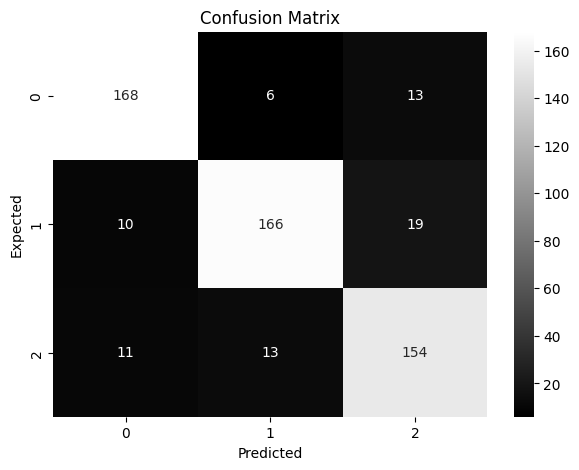

In [ ]:
# Generate confusion matrix
cm = metrics.confusion_matrix(expected, predicted)

# Plot confusion matrix in black and white
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='gray')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


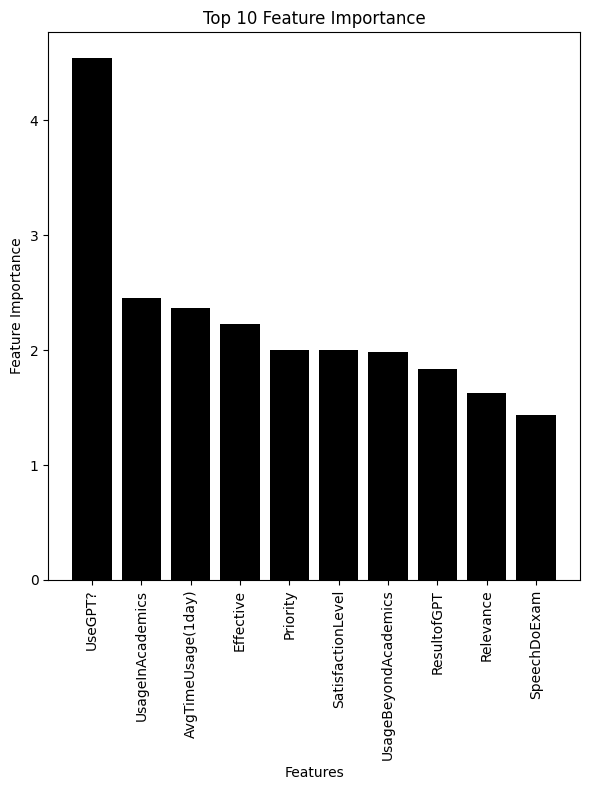

In [ ]:
import matplotlib.pyplot as plt

# Data
importance = final_model.get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
top_10_features = sorted_importance[:10]

features = [item[0] for item in top_10_features]
values = [item[1] for item in top_10_features]

# Plot
plt.figure(figsize=(6, 8))
plt.bar(features, values, color='black')  # Change to vertical bars
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 10 Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


# ***`Random Forest`***

In [ ]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_scaled, y_train)

In [ ]:
expected = y_test
predicted = RF_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_RF= metrics.confusion_matrix(expected, predicted)
print(cm_RF)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# generate a no skill (ns) prediction and random forest (rf) predictions.
ns_probs = [0 for i in range(len(y_test))]
rf_probs = RF_classifier.predict_proba(X_test_scaled)[:,1]
# calculating scores for no skill and random forest
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:

param_grid = {
    'n_estimators': [10,25,30,50,100,200],
    'max_depth': [2,3,5,10,20],
    'criterion':['entropy','gini'],
    'min_samples_leaf': [5,10,20,50,100,200],
    'min_samples_split': [2, 5, 10],
}

# Tạo đối tượng GridSearchCV
grid_search_RF = GridSearchCV(estimator=RF_classifier,
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv = 5,
                           verbose=1,
                           scoring="accuracy")

grid_search_RF.fit(X_train_scaled, y_train)
grid_search_RF.best_estimator_


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=200)

In [ ]:
expected = y_test
predicted = grid_search_RF.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           1       0.78      0.86      0.81       187
           2       0.86      0.77      0.81       195
           3       0.79      0.79      0.79       178

    accuracy                           0.81       560
   macro avg       0.81      0.81      0.80       560
weighted avg       0.81      0.81      0.81       560

[[160  11  16]
 [ 22 151  22]
 [ 24  14 140]]


# ***`Logistic Regression`***

In [ ]:
!pip install mord


In [ ]:
from sklearn.linear_model import LogisticRegression

# Tạo và huấn luyện mô hình Logistic Regression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_scaled, y_train)

expected = y_test
predicted = LR_model.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_LR= metrics.confusion_matrix(expected, predicted)
print(cm_LR)


              precision    recall  f1-score   support

           1       0.59      0.59      0.59       187
           2       0.58      0.54      0.56       195
           3       0.68      0.72      0.70       178

    accuracy                           0.62       560
   macro avg       0.62      0.62      0.62       560
weighted avg       0.61      0.62      0.61       560

[[111  53  23]
 [ 53 105  37]
 [ 25  24 129]]


In [ ]:
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search_LR = GridSearchCV(estimator=LR_model, param_grid=param_grid_LR, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_LR.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_LR.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_LR.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_LR.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 63.78%
Test Accuracy: 61.43%


In [ ]:
expected = y_test
predicted = grid_search_LR.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           1       0.59      0.57      0.58       187
           2       0.57      0.55      0.56       195
           3       0.68      0.74      0.71       178

    accuracy                           0.61       560
   macro avg       0.61      0.62      0.61       560
weighted avg       0.61      0.61      0.61       560

[[106  58  23]
 [ 50 107  38]
 [ 24  23 131]]


# **`SVM`**

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)


SVC()

In [ ]:
expected = y_test
predicted = svm_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           1       0.75      0.76      0.76       187
           2       0.77      0.74      0.75       195
           3       0.76      0.78      0.77       178

    accuracy                           0.76       560
   macro avg       0.76      0.76      0.76       560
weighted avg       0.76      0.76      0.76       560

[[142  29  16]
 [ 23 144  28]
 [ 24  15 139]]


In [ ]:
param_grid_SVM = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Create the GridSearchCV object
grid_search_SVM = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_SVM, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_SVM.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_SVM.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_SVM.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_SVM.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 80.78%
Test Accuracy: 85.36%


In [ ]:
expected = y_test
predicted = grid_search_SVM.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           1       0.90      0.87      0.88       187
           2       0.85      0.85      0.85       195
           3       0.82      0.84      0.83       178

    accuracy                           0.85       560
   macro avg       0.85      0.85      0.85       560
weighted avg       0.85      0.85      0.85       560

[[162  13  12]
 [  7 166  22]
 [ 12  16 150]]


# ***`ANN`***

In [ ]:
!pip install scikeras # Install scikeras
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras

In [ ]:
# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),  # Lớp đầu vào
    tf.keras.layers.Dropout(0.2),  # Thêm Dropout để giảm overfitting
    tf.keras.layers.Dense(64, activation='relu'),  # Lớp ẩn thứ hai
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),  # Lớp ẩn thứ ba
    tf.keras.layers.Dense(3, activation='softmax')  # Lớp đầu ra, 3 neurons cho 3 nhãn
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Sử dụng categorical_crossentropy cho phân loại nhiều nhãn
              metrics=['accuracy'])

# Convert y_train to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=3)

# Train the model
history = model.fit(X_train_scaled, y_train_encoded,
                    epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model on the test set
y_test_encoded = to_categorical(y_test, num_classes=3)  # Chuyển đổi y_test sang one-hot encoding
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Display classification report
from sklearn.metrics import classification_report
y_test_labels = np.argmax(y_test_encoded, axis=1)  # Chuyển y_test_encoded về nhãn gốc
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3680 - loss: 1.0841 - val_accuracy: 0.5153 - val_loss: 1.0245
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4964 - loss: 1.0263 - val_accuracy: 0.5611 - val_loss: 0.9538
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5549 - loss: 0.9679 - val_accuracy: 0.5687 - val_loss: 0.9070
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5698 - loss: 0.9202 - val_accuracy: 0.6031 - val_loss: 0.8768
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5999 - loss: 0.8834 - val_accuracy: 0.6107 - val_loss: 0.8540
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5883 - loss: 0.8842 - val_accuracy: 0.6336 - val_loss: 0.8229
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5937 - loss: 0.8679 - val_accuracy: 0.6412 - val_loss: 0.8045
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6214 - loss: 0.8313 - val_accuracy: 0.6527 - val_loss

In [ ]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       187
           1       0.81      0.87      0.84       195
           2       0.82      0.78      0.80       178

    accuracy                           0.84       560
   macro avg       0.84      0.83      0.83       560
weighted avg       0.84      0.84      0.84       560

Confusion Matrix:
[[160  13  14]
 [  8 170  17]
 [ 12  28 138]]


In [ ]:
!pip install scikeras # Install scikeras
import tensorflow as tf
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier # This line caused the error
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:


# Define the function to build the ANN model
def build_model(optimizer='adam', neurons=128, dropout_rate=0.2):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(neurons, activation='relu', input_dim=X_train_scaled.shape[1]),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons // 2, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons // 4, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')  # Output layer for 3 classes
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
model = KerasClassifier(model=build_model, verbose=0)

# Define the grid of parameters to search
param_grid = {
    'model__neurons': [64, 128],
    'model__dropout_rate': [0.2, 0.3],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# One-hot encode the target
y_train_encoded = to_categorical(y_train, num_classes=3)

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the grid search
grid_result = grid.fit(X_train_scaled, y_train_encoded)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_result.best_params_)
print("Best Cross-Validation Accuracy:", grid_result.best_score_)

# Evaluate the best model on the test set
y_test_encoded = to_categorical(y_test, num_classes=3)
test_loss, test_accuracy = grid_result.best_estimator_.model_.evaluate(X_test_scaled, y_test_encoded, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = np.argmax(grid_result.best_estimator_.model_.predict(X_test_scaled), axis=1)

# Display classification report
y_test_labels = np.argmax(y_test_encoded, axis=1)
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.2, 'model__neurons': 128, 'model__optimizer': 'adam'}
Best Cross-Validation Accuracy: 0.7978663573412069
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.6549  
Test Accuracy: 0.83
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       187
           1       0.84      0.84      0.84       195
           2       0.78      0.82      0.80       178

    accuracy                           0.83       560
   macro avg       0.83      0.83      0.83       560
weighted avg       0.84      0.83      0.83       560

